Impoting Libraries

In [14]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np

Retrieving Data

In [15]:
#  https://en.wikipedia.org/wiki/Nikola_Tesla
url = "https://en.wikipedia.org/wiki/Nikola_Tesla"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    # Now, you can start extracting data from the soup object
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [16]:
# Find all paragraph elements
paragraphs = soup.find_all('p')

# Extract plain text and HTML text
plain_text = "\n".join([paragraph.get_text() for paragraph in paragraphs])
html_text = "\n".join([str(paragraph) for paragraph in paragraphs])


In [17]:


# Create DataFrames
plain_text_df = pd.DataFrame(data={'text': [plain_text]})
html_text_df = pd.DataFrame(data={'html_text': [html_text]})

# Save to text files
plain_text_df.to_csv('plain_text.txt', index=False, header=False)
html_text_df.to_csv('html_text.txt', index=False, header=False)


In [18]:
# Find all hyperlinks
hyperlinks = soup.find_all('a')

# Extract text and link for each hyperlink
data = {'Text': [], 'Link': []}

for link in hyperlinks:
    text = link.get_text(strip=True)
    href = link.get('href')
    if text and href:  # Ensure both text and link exist
        data['Text'].append(text)
        data['Link'].append(href)

# Create DataFrame
hyperlinks_df = pd.DataFrame(data)


In [19]:
# Save DataFrame to a CSV file
hyperlinks_df.to_csv('hyperlinks.csv', index=False)


Data cleaning, manipulation and preprocessing

In [20]:
# Counting the number of rows
hyperlinks_df.shape[0]

2557

In [21]:
# Remove duplicate rows
hyperlinks_df.drop_duplicates(inplace=True)

# Remove rows with missing values
hyperlinks_df.dropna(inplace=True)

In [26]:
# Counting the number of rows after removing duplicates and null values 
hyperlinks_df.shape[0]

2180

In [23]:
# Save the cleaned hyperlinks DataFrame to a new CSV file
hyperlinks_df.to_csv('cleaned_hyperlinks.csv', index=False)


Data Visualization

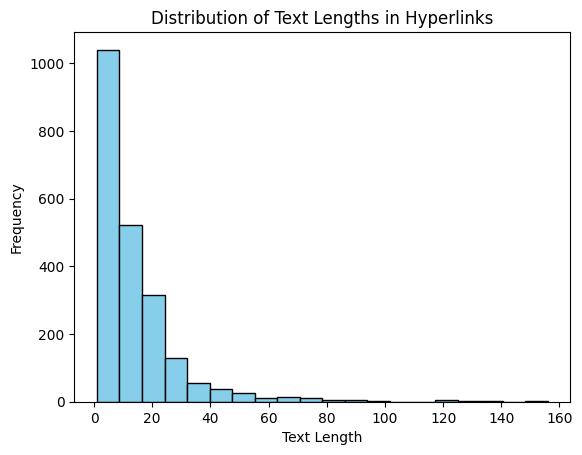

In [24]:
# Visualizing the distribution of text lengths
import matplotlib.pyplot as plt 
text_lengths = hyperlinks_df['Text'].apply(len)
plt.hist(text_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths in Hyperlinks')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.savefig('text_lengths_distribution.png')
plt.show()

In [25]:
# Calculate summary statistics of the 'Link' column
link_summary_stats = hyperlinks_df['Link'].describe()
print("Summary Statistics of 'Link' column:\n", link_summary_stats)

Summary Statistics of 'Link' column:
 count                       2180
unique                      2128
top       /wiki/Polyphase_system
freq                           3
Name: Link, dtype: object
